<a href="https://colab.research.google.com/github/eeolga/article/blob/main/3D_merged_weighted_data_corelation_training_14_10_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
import torch.nn as nn

In [ ]:
import pandas as pd

In [ ]:
CAD_path="/content/combined_data_12102024.xlsx"

CAD_logs file data

In [ ]:
data = pd.read_excel("/content/combined_data_12102024.xlsx")

In [ ]:
display(pd.DataFrame(data))

,timestamp,userid,toolid,activityid,competency_weight,tool_weight,activity_weight,perfomance
0,"1/02/24, 10:46:00",18630,233150,10503,0.0152,0.0370,0.0543,0.002009
1,"1/03/24, 09:50:22",21041,233162,20807,0.0455,0.1111,0.1628,0.018087
2,"1/03/24, 09:50:32",21041,233162,20807,0.0455,0.1111,0.1628,0.018087
3,"1/03/24, 09:50:37",21041,256461,30807,0.0606,0.1481,0.2171,0.032153
4,"1/03/24, 09:57:15",21041,256461,30807,0.0606,0.1481,0.2171,0.032153
...,...,...,...,...,...,...,...,...
7470,"9/05/24, 16:09:17",29275,233172,10403,0.0303,0.0370,0.0715,0.002645
7471,"9/05/24, 16:09:24",29275,256461,20807,0.0455,0.1111,0.1628,0.018087
7472,"9/06/24, 00:22:05",26342,233144,10303,0.0152,0.0370,0.0543,0.002009
7473,"9/06/24, 21:31:13",26502,258703,40807,0.0758,0.1852,0.2714,0.050263


Feature Engineering

In [ ]:
df = pd.read_excel("/content/combined_data_12102024.xlsx")
test_df = pd.read_excel("/content/combined_data_12102024.xlsx")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7475 entries, 0 to 7474
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   timestamp          7475 non-null   object 
 1   userid             7475 non-null   int64  
 2   toolid             7475 non-null   int64  
 3   activityid         7475 non-null   int64  
 4   competency_weight  7475 non-null   float64
 5   tool_weight        7475 non-null   float64
 6   activity_weight    7475 non-null   float64
 7   perfomance         7475 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 467.3+ KB


In [ ]:
def feature_engineering(df): #feature engineering function

    return df

In [ ]:
df = feature_engineering(df)

In [ ]:
df = df.drop(['timestamp'], axis=1) # Remove columns I no longer need

In [ ]:
def scale_min_max(df, col_name, xmin, xmax):  # Normalization
    df[col_name] = (df[col_name] - xmin) / (xmax - xmin)
    return df

train_activity_min = df['perfomance'].min()
train_activity_max = df['perfomance'].max()
df = scale_min_max(df, 'perfomance', train_activity_min, train_activity_max)

df['perfomance'].describe()

,perfomance
count,7475.000000
mean,0.473971
std,0.346051
min,0.000000
25%,0.333194
50%,0.333194
75%,0.627749
max,1.000000


Data correlation

In [ ]:
def divide_df(all_data):
    # Returns divided dfs of training and test set
    return all_data.loc[:16], all_data.loc[16:].drop(['timestamp'], axis=1)

df_train = pd.read_excel("/content/combined_data_12102024.xlsx")
df_test = pd.read_excel("/content/combined_data_12102024.xlsx")


df_train.name = 'Training Set'
df_test.name = 'Test Set'


dfs = [df_train, df_test]

print('Number of Training Examples = {}'.format(df_train.shape[0]))
print('Number of Test Examples = {}\n'.format(df_test.shape[0]))
print('Training X Shape = {}'.format(df_train.shape))
print('Training y Shape = {}\n'.format(df_train['perfomance'].shape[0]))
print('Test X Shape = {}'.format(df_test.shape))
print('Test y Shape = {}\n'.format(df_test.shape[0]))
print(df_train.columns)
print(df_test.columns)

Number of Training Examples = 7475
Number of Test Examples = 7475

Training X Shape = (7475, 8)
Training y Shape = 7475

Test X Shape = (7475, 8)
Test y Shape = 7475

Index(['timestamp', 'userid', 'toolid', 'activityid', 'competency_weight',
       'tool_weight', 'activity_weight', 'perfomance'],
      dtype='object')
Index(['timestamp', 'userid', 'toolid', 'activityid', 'competency_weight',
       'tool_weight', 'activity_weight', 'perfomance'],
      dtype='object')


In [ ]:
# Ensure 'timestamp' column is dropped from both training and test datasets
df_train_cleaned = df_train.drop(['timestamp', 'activity_weight'], axis=1)
df_test_cleaned = df_test.drop([ 'timestamp','activity_weight'], axis=1)

In [ ]:
# Verify all columns in df_train_cleaned and df_test_cleaned are numeric
numeric_columns_train = df_train_cleaned.select_dtypes(include=[int, float]).columns
numeric_columns_test = df_test_cleaned.select_dtypes(include=[int, float]).columns

In [ ]:
# Compute correlations only on numeric columns
df_train_corr = df_train_cleaned[numeric_columns_train].corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_train_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_train_corr.drop(df_train_corr.iloc[1::2].index, inplace=True)
df_train_corr_nd = df_train_corr.drop(df_train_corr[df_train_corr['Correlation Coefficient'] == 1.0].index)


In [ ]:
df_test_corr = df_test_cleaned[numeric_columns_test].corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_test_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_test_corr.drop(df_test_corr.iloc[1::2].index, inplace=True)
df_test_corr_nd = df_test_corr.drop(df_test_corr[df_test_corr['Correlation Coefficient'] == 1.0].index)

In [ ]:
corr = df_train_corr_nd['Correlation Coefficient'] > 0.1 # Training set correlations
df_train_corr_nd[corr]

,Feature 1,Feature 2,Correlation Coefficient
6,competency_weight,perfomance,0.986358
8,tool_weight,competency_weight,0.974543
10,perfomance,tool_weight,0.972900
12,activityid,perfomance,0.950442
14,competency_weight,activityid,0.941415
16,activityid,tool_weight,0.932179
18,tool_weight,toolid,0.331692
20,activityid,toolid,0.290977
22,toolid,perfomance,0.286820
24,competency_weight,toolid,0.281318


In [ ]:
corr = df_test_corr_nd['Correlation Coefficient'] > 0.1
df_test_corr_nd[corr]

,Feature 1,Feature 2,Correlation Coefficient
6,competency_weight,perfomance,0.986358
8,tool_weight,competency_weight,0.974543
10,perfomance,tool_weight,0.972900
12,activityid,perfomance,0.950442
14,competency_weight,activityid,0.941415
16,activityid,tool_weight,0.932179
18,tool_weight,toolid,0.331692
20,activityid,toolid,0.290977
22,toolid,perfomance,0.286820
24,competency_weight,toolid,0.281318


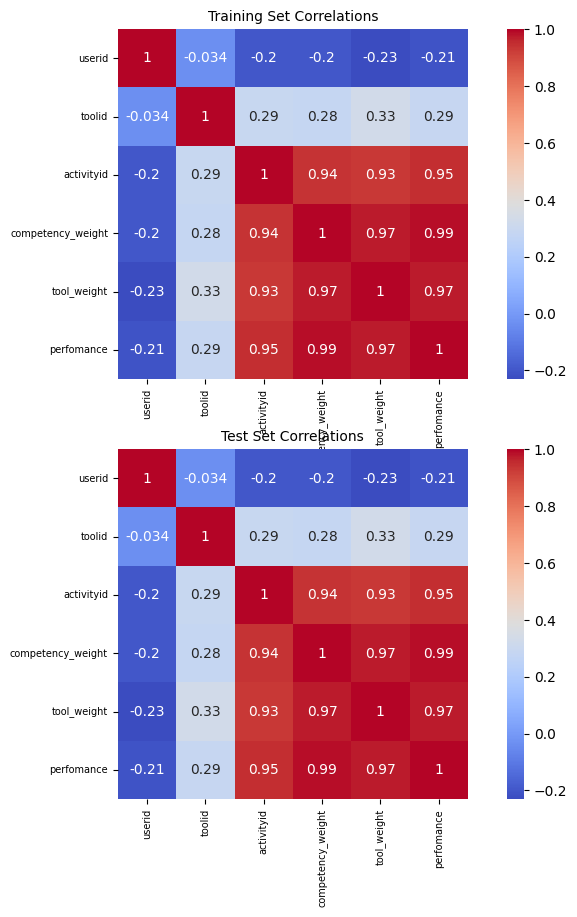

In [ ]:
import matplotlib.pyplot as plt # Import the matplotlib library and give it the alias 'plt'
import seaborn as sns

fig, axs = plt.subplots(nrows=2, figsize=(10, 10))

sns.heatmap(df_train.drop(['timestamp','activity_weight'], axis=1).corr(), ax=axs[0], annot=True, square=True, cmap='coolwarm', annot_kws={'size': 10})
sns.heatmap(df_test.drop(['timestamp','activity_weight'], axis=1).corr(), ax=axs[1], annot=True, square=True, cmap='coolwarm', annot_kws={'size': 10})

for i in range(2):
    axs[i].tick_params(axis='x', labelsize=7)
    axs[i].tick_params(axis='y', labelsize=7)

axs[0].set_title('Training Set Correlations', size=10)
axs[1].set_title('Test Set Correlations', size=10)

plt.show()

Data model training

Index(['timestamp', 'userid', 'toolid', 'activityid', 'competency_weight',
       'tool_weight', 'activity_weight', 'perfomance'],
      dtype='object')
Non-numeric columns: Index(['timestamp'], dtype='object')
Epoch [5/50], Loss: 0.6741, Val Loss: 0.6654
Epoch [10/50], Loss: 0.6349, Val Loss: 0.6255
Epoch [15/50], Loss: 0.5877, Val Loss: 0.5751
Epoch [20/50], Loss: 0.5240, Val Loss: 0.5066
Epoch [25/50], Loss: 0.4383, Val Loss: 0.4148
Epoch [30/50], Loss: 0.3334, Val Loss: 0.3072
Epoch [35/50], Loss: 0.2287, Val Loss: 0.2045
Epoch [40/50], Loss: 0.1430, Val Loss: 0.1245
Epoch [45/50], Loss: 0.0837, Val Loss: 0.0715
Epoch [50/50], Loss: 0.0476, Val Loss: 0.0403


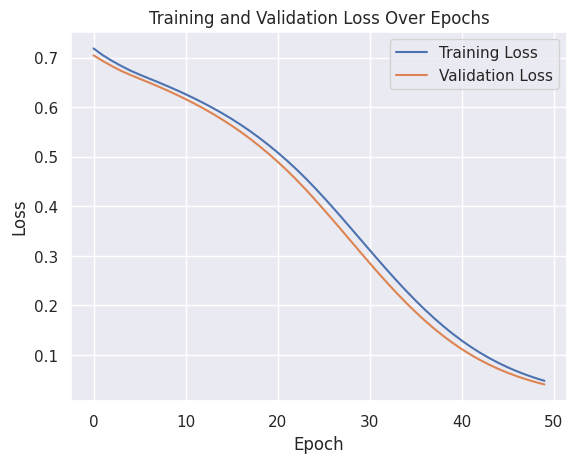

Raw outputs (first 10): tensor([0.0038, 0.0511, 0.0016, 0.1034, 0.0826, 0.0014, 0.0026, 0.0636, 0.0507,
        0.0033])
Unique values in predictions with threshold 0.1: tensor([0., 1.])
              precision    recall  f1-score   support

     class 0       1.00      0.86      0.93      1495
     class 1       0.00      0.00      0.00         0

    accuracy                           0.86      1495
   macro avg       0.50      0.43      0.46      1495
weighted avg       1.00      0.86      0.93      1495



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

# Load Data from Excel
file_path = '/content/combined_data_12102024.xlsx'
data = pd.read_excel(file_path)

# Print the column names to verify 'competency' exists
print(data.columns)

# Assuming your Excel file has columns 'features' and 'target'
# Adjust 'competency' to the actual column name if necessary
X = data.drop('perfomance', axis=1)
y = data['perfomance'].values

# Identify non-numeric columns
non_numeric_cols = X.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_cols)

# Handle non-numeric columns (example: drop them)
X = X.drop(non_numeric_cols, axis=1).values

# Ensure target values are 0 or 1
y = (y == 1).astype(float)

#  Preprocess Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Define the Model
class ImprovedNN(nn.Module):
    def __init__(self, input_dim):
        super(ImprovedNN, self).__init__()
        self.layer1 = nn.Linear(input_dim, 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 32)
        self.layer4 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.layer3(x))
        x = torch.sigmoid(self.layer4(x))
        return x

input_dim = X_train.shape[1]
model = ImprovedNN(input_dim)

# SDefine Loss Function and Optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the Model
num_epochs = 50
training_losses = []
validation_losses = []

for epoch in range(num_epochs):
    model.train()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    training_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test)
        val_loss = criterion(val_outputs, y_test)
        validation_losses.append(val_loss.item())

    if (epoch+1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

plt.plot(training_losses, label='Training Loss')
plt.plot(validation_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

# Evaluate the Model
model.eval()
with torch.no_grad():
    raw_outputs = model(X_test)
    print(f'Raw outputs (first 10): {raw_outputs[:10].flatten()}')

    # Adjust threshold if necessary
    threshold = 0.1
    y_predicted = (raw_outputs > threshold).float()
    unique_values = y_predicted.unique()
    print(f'Unique values in predictions with threshold {threshold}: {unique_values}')

    y_test_flat = y_test.flatten()
    if len(unique_values) == 1:
        print(f'Only one class ({unique_values.item()}) predicted with threshold {threshold}.')
    else:
        print(classification_report(y_test_flat, y_predicted, target_names=['class 0', 'class 1']))

Index(['timestamp', 'userid', 'toolid', 'activityid', 'competency_weight',
       'tool_weight', 'activity_weight', 'perfomance'],
      dtype='object')
Non-numeric columns: Index(['timestamp'], dtype='object')
Epoch [10/100], Loss: 0.5750, Val Loss: 0.5563
Epoch [20/100], Loss: 0.3557, Val Loss: 0.3291
Epoch [30/100], Loss: 0.1339, Val Loss: 0.1161
Epoch [40/100], Loss: 0.0337, Val Loss: 0.0286
Epoch [50/100], Loss: 0.0095, Val Loss: 0.0083
Epoch [60/100], Loss: 0.0039, Val Loss: 0.0035
Epoch [70/100], Loss: 0.0022, Val Loss: 0.0020
Epoch [80/100], Loss: 0.0015, Val Loss: 0.0014
Epoch [90/100], Loss: 0.0011, Val Loss: 0.0010
Epoch [100/100], Loss: 0.0009, Val Loss: 0.0008


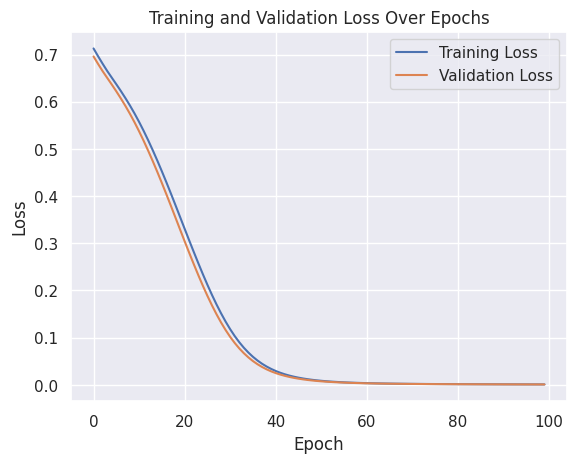

Raw outputs (first 10): tensor([6.5633e-07, 1.8551e-03, 9.1478e-06, 3.0294e-03, 3.2047e-03, 1.0508e-07,
        1.9305e-05, 1.1104e-03, 1.8561e-03, 6.0946e-07])
Unique values in predictions with threshold 0.1: tensor([0.])
Only one class (0.0) predicted with threshold 0.1.


In [ ]:
# Load Data from Excel
file_path = '/content/combined_data_12102024.xlsx'
data = pd.read_excel(file_path)

# Print the column names to verify 'competency' exists
print(data.columns)

# Assuming your Excel file has columns 'features' and 'target'
# Adjust 'competency' to the actual column name if necessary
X = data.drop('perfomance', axis=1)
y = data['perfomance'].values

# Identify non-numeric columns
non_numeric_cols = X.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_cols)

# Handle non-numeric columns (example: drop them)
X = X.drop(non_numeric_cols, axis=1).values

# Ensure target values are 0 or 1
y = (y == 1).astype(float)

#  Preprocess Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Define the Model
class ImprovedNN(nn.Module):
    def __init__(self, input_dim):
        super(ImprovedNN, self).__init__()
        self.layer1 = nn.Linear(input_dim, 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 32)
        self.layer4 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.layer3(x))
        x = torch.sigmoid(self.layer4(x))
        return x

input_dim = X_train.shape[1]
model = ImprovedNN(input_dim)

# SDefine Loss Function and Optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the Model
num_epochs = 100
training_losses = []
validation_losses = []

for epoch in range(num_epochs):
    model.train()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    training_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test)
        val_loss = criterion(val_outputs, y_test)
        validation_losses.append(val_loss.item())

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

plt.plot(training_losses, label='Training Loss')
plt.plot(validation_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

# Evaluate the Model
model.eval()
with torch.no_grad():
    raw_outputs = model(X_test)
    print(f'Raw outputs (first 10): {raw_outputs[:10].flatten()}')

    # Adjust threshold if necessary
    threshold = 0.1
    y_predicted = (raw_outputs > threshold).float()
    unique_values = y_predicted.unique()
    print(f'Unique values in predictions with threshold {threshold}: {unique_values}')

    y_test_flat = y_test.flatten()
    if len(unique_values) == 1:
        print(f'Only one class ({unique_values.item()}) predicted with threshold {threshold}.')
    else:
        print(classification_report(y_test_flat, y_predicted, target_names=['class 0', 'class 1']))